In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import sys 
sys.path.append("../../devices")

In [3]:
from functiongenerator import AFG2225
from picoammeter import Keithley6487
from powersupply import NGE100
from redpitaya import RedPitaya

In [4]:
red = RedPitaya('172.28.175.57')

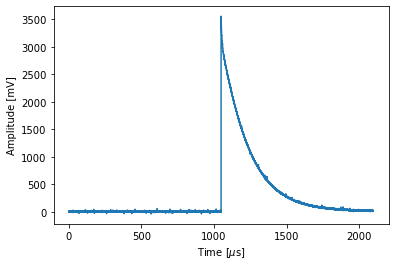

In [8]:
size = 1024*2**4
delay = 0

red.configure(dec_fac=2**4)
red.trigger(ch=2, level=500, delay=delay)
t, data = red.acquire(ch=2, size=size, ascii=True)

plt.figure()
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.plot(t,data)
plt.show()

In [4]:
nge = NGE100('USB0::0x0AAD::0x0197::5601.1414k03-100771::INSTR')

In [5]:
func = AFG2225('ASRL19::INSTR')
func.open()

In [6]:
pico = Keithley6487('ASRL9::INSTR')

In [8]:
nge.output(ch=1, state=True)
nge.output(ch=2, state=True)

for x in np.arange(0,10,1):
    nge.voltage(ch=1, volt=x)
    nge.voltage(ch=2, volt=x)
    time.sleep(0.5)

nge.output(ch=1, state=False)
nge.output(ch=2, state=False)

In [9]:
pico.write("*RST")
pico.voltage_source_state(False)
pico.voltage_source_state(True)
pico.write("SOUR:VOLT:RANG 50")
time.sleep(2)
for x in np.arange(1,40,1):
    pico.voltage(x)
    time.sleep(0.1)
pico.voltage(0)
pico.voltage_source_state(False)

In [4]:
red = redpitaya_scpi('172.28.175.57')

In [6]:
trigger=waveform_file.acquire_trigger(2,100,0,4)
print(trigger)

16


In [ ]:
for x in np.arange(0.5,5.1,0.5):
    func.set_amplitude(2, x)
    func.set_offset(2, x/2.0)
    

    
    

In [ ]:
pwd